# WORLD HAPPINESS EXPLANATORY DATA ANALYSIS

## What will you learn from this project?
* Bivariate data analysis
* Multivariate data analysis
* Seaborn library visualization techniques: bar, box, kde, swarm, heatmap, clustermap
* Plotly library visualization techniques: animated plot and world map

## Introduction
* The World Happiness Report is a landmark survey of the state of global happiness. 
* The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. 
* Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. 
* The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

![mutluluk.JPG](attachment:76ae63e6-c7ed-4512-a0b5-4ac821637e81.JPG)

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Data Distributions in 2021](#4)
1. [Happiest and Unhappiest Countries in 2021](#5)
1. [Ladder Score Distribution by Regional Indicator](#6)
1. [Ladder Score Distribution by Countries in Map View](#7)
1. [Most Generous and Most Ungenerous Countries in 2021](#8)
1. [Generous Distribution by Countries in Map View](#9)
1. [Generous Distribution by Regional Indicator in 2021](#10)
1. [Relationship Between Happiness and Income](#11)
1. [Relationship Between Happiness and Freedom](#12)
1. [Relationship Between Happiness and Corruption](#13)
1. [Relationship Between Features](#14)
1. [Conclusion](#15)

<a id='1'></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

<a id='2'></a>
## Data Content
* The happiness scores and rankings use data from the Gallup World Poll. 
    * Gallup World Poll: In 2005, Gallup began its World Poll, which continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.
* The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 
* **Ladder score:** Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita:** The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support:** Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy:** Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices:** Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* **Generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption:** The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia:** It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia
* World Happiness Report Official Website: https://worldhappiness.report/

<a id='3'></a>
## Read and Analyse Data

In [5]:
# read data
df = pd.read_csv("world-happiness-report-2021.csv.xls")

In [6]:
# show first five row of data
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
# describe basic statistics of data
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [8]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [10]:
# read data
df2021 = pd.read_csv("world-happiness-report-2021.csv.xls")

In [11]:
# read data
df = pd.read_csv("world-happiness-report-2021.csv.xls")

In [12]:
# show first five row of data
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [13]:
# describe basic statistics of data
df2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [14]:
# information about data
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

<a id='4'></a>
## Data Distributions in 2021
* Unique Countries
* Count Regional Indicator
* Distribution of Remaining Features

In [15]:
# unique countries
df2021['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

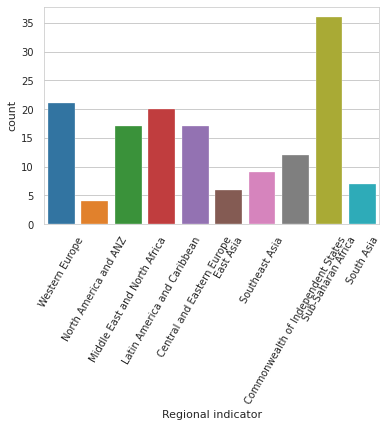

In [16]:
# count regional indicator
sns.countplot(df2021["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()

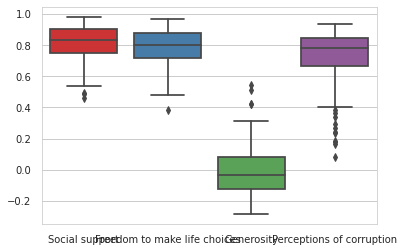

In [17]:
# distribution of feature set 1
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

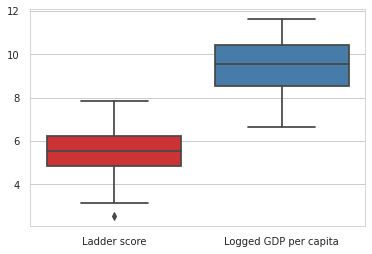

In [18]:
# distribution of feature set 2
list_features = ["Ladder score", "Logged GDP per capita"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

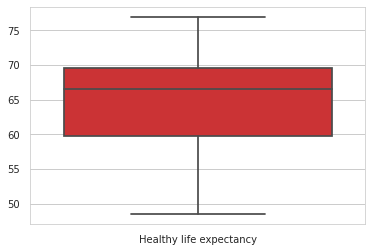

In [19]:
# distribution of feature set 3
list_features = ["Healthy life expectancy"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

<a id='5'></a>
## Happiest and Unhappiest Countries in 2021

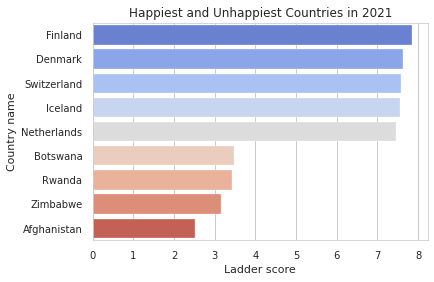

In [20]:
df2021_happiest_unhappiest = df2021[(df2021.loc[:, "Ladder score"] > 7.4) | (df2021.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=df2021_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

<a id='6'></a>
## Ladder Score Distribution by Regional Indicator

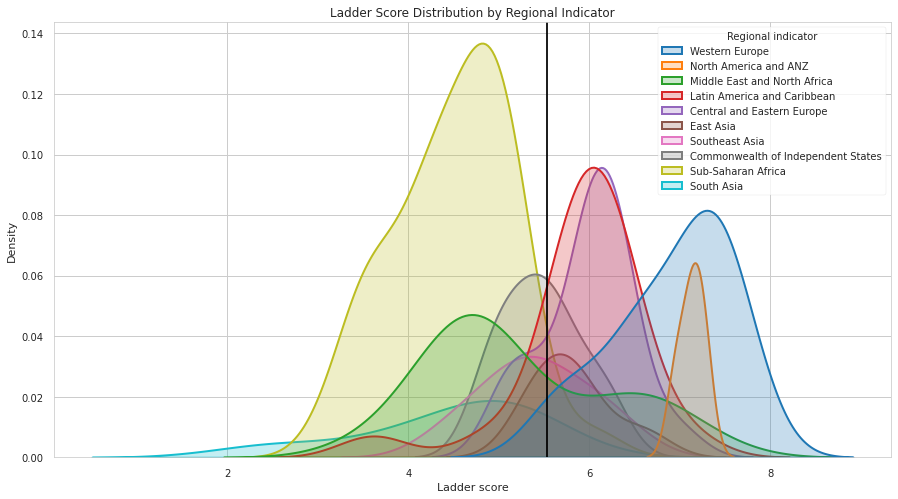

In [21]:
plt.figure(figsize = (15,8))
sns.kdeplot(df2021["Ladder score"], hue = df2021["Regional indicator"], fill = True, linewidth = 2)
plt.axvline(df2021["Ladder score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

<a id='7'></a>
## Ladder Score Distribution by Countries in Map View

In [22]:
df.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


<a id='8'></a>
## Most Generous and Most Ungenerous Countries in 2021

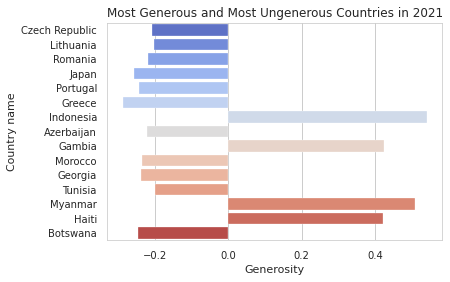

In [25]:
df2021_g = df2021[(df2021.loc[:, "Generosity"] > 0.4) | (df2021.loc[:, "Generosity"] < -0.2)]
sns.barplot(x = "Generosity", y = "Country name", data = df2021_g, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2021")
plt.show()

<a id='10'></a>
## Generous Distribution by Regional Indicator in 2021

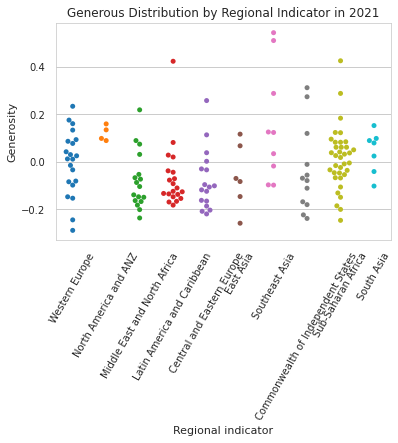

In [29]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df2021)
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

In [35]:
country_continent = {}
for i in range(len(df2021)):
    country_continent[df2021["Country name"][i]] = df2021["Regional indicator"][i]
all_countries = df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_2021 = df2021["Country name"].value_counts().reset_index()["index"].tolist()

for x in all_countries:
    if x not in all_countries_2021:
        print(x)

In [32]:
region = []
for i in range(len(df)):
    if df['Country name'][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Congo (Kinshasa)':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Cuba':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Somaliland region':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'South Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Oman':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Bhutan':
        region.append("South Asia")
    elif df['Country name'][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent[df['Country name'][i]])
        
df["region"] = region

In [33]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,region
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Western Europe
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,Western Europe
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,Western Europe
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,Western Europe
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,Western Europe


In [37]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'region'],
      dtype='object')

<a id='14'></a>
## Relationship Between Features 

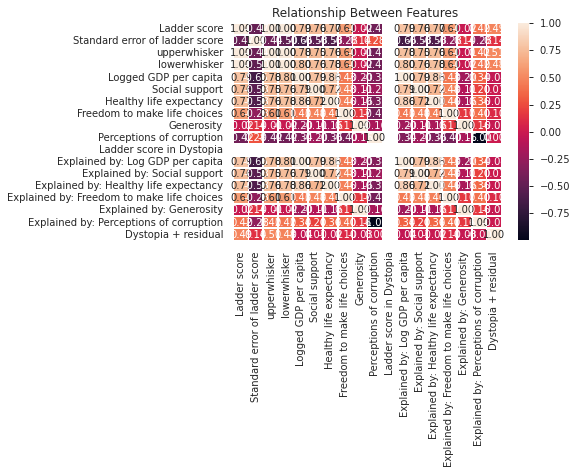

In [42]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

<a id='15'></a>
## Conclusion
* Lets make a practice know!
* You can make different analyzes to reinforce what you have learned.